# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [11]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [12]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
#print df_raw.head()

## Questions
#### Question 1. How many observations are in our dataset? 


In [13]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [14]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a much larger mean value than GPA so we would expect the STD to also be larger. 

#### Question 4. Drop data points with missing data


In [15]:
print(df_raw.isnull().sum())

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


In [17]:
df_raw.dropna(inplace=True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [18]:
print(df_raw.isnull().sum())

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### Question 6. Create box plots for GRE and GPA

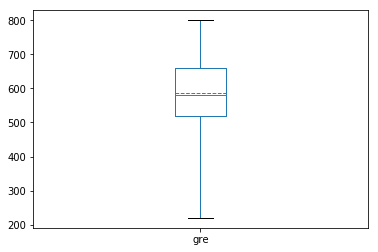

In [19]:
#boxplot 1
df_raw['gre'].plot(kind='box', whis = 'range', meanline = True, showmeans = True);

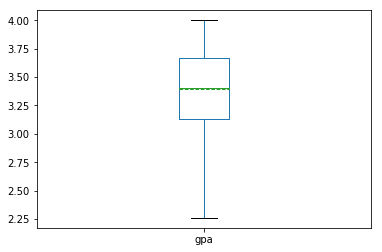

In [20]:
#boxplot 2 
df_raw['gpa'].plot(kind='box', whis = 'range', meanline = True, showmeans = True);

#### Question 7. What do this plots show?

Answer: GRE and GPA both have a long tails and especially to the left and appear to be negatively skewed meaning that both the median and mode score for GRE and GPA are above the median score. 

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E448C37F0>,
      dtype=object)

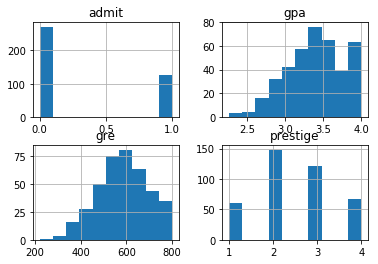

In [21]:
# plot the distribution of each variable 

df_raw.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No - none of the variables have a normal distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes both GRE and GPA scores do not follow a normal distribution and both appear to be left skewed. we need a normal disctribution to achieve results that is representative of the population mean. in order to do so we may need to collect additional data points. 

#### Question 11. Which of our variables are potentially colinear? 

In [22]:
# create a correlation matrix for the data
df_raw_corr = df_raw.corr()
print(df_raw_corr)

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

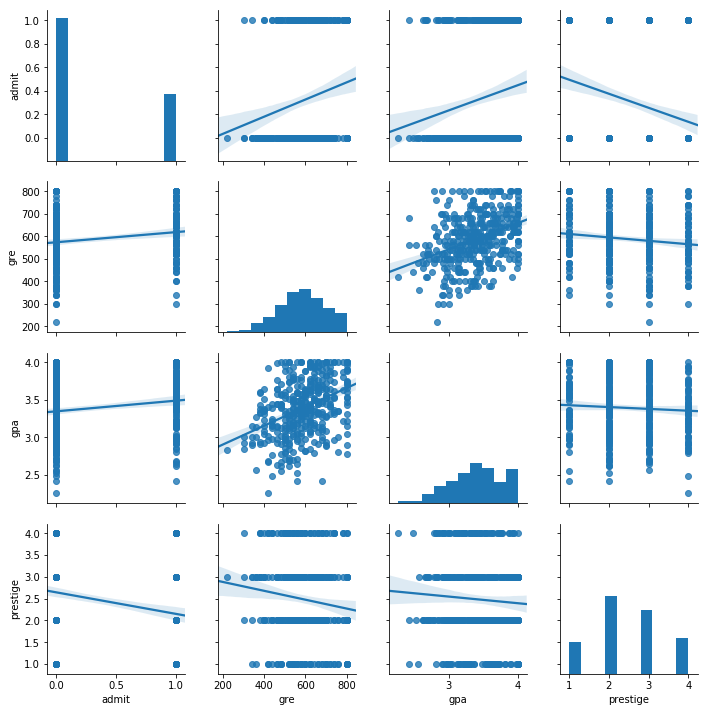

In [23]:
sns.pairplot(df_raw, kind = 'reg');

Answer:  none of the variables are potentially colinear  

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will use the data on grad school admittance, GPA, GRE and the prestige of undergraduate school (ranked from 1 to 4 - 1 = most presitigious and 4 = least prestigious) and perform exploratory data analysis to look at the distribution of the data and see whether it is normally disctibuted and hence can be used to represent the sample population. 

We also want to understand the variation in each variable by looking at the standard deviation and to see if there appears to be any relationship between the variables by looking at the correlation matrix. 

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that GRE, GPA and the rpestige of undergraduate school are all postively correlated to grad school admittance. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [11]:
#replace NA's in GPA with its mean
df_raw["gpa"].fillna(df_raw['gpa'].mean(), inplace=True)

In [12]:
#replace NA's in GRE with its mean
df_raw["gre"].fillna(df_raw['gre'].mean(), inplace=True)

In [13]:
print(df_raw.isnull().sum())

admit       0
gre         0
gpa         0
prestige    1
dtype: int64


#### 2. Bonus: Log transform the skewed data

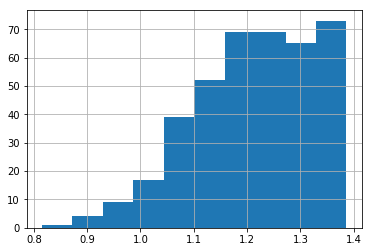

In [40]:
gpa_log = df_raw['gpa'].apply(np.log)
gpa_log.hist()

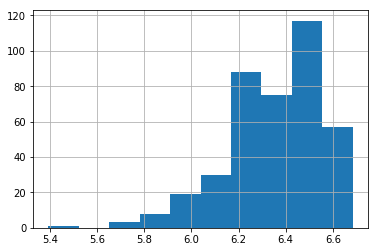

In [41]:
gre_log = df_raw['gre'].apply(np.log)
gre_log.hist()


#### 3. Advanced: Impute missing data